In [1]:
x <- c(
    1.77, -0.23, 2.76, 3.80, 3.47,
    56.75, -1.34, 4.24, -2.44, 3.29,
    3.71, -2.40, 4.53, -0.07, -1.05,
    -13.87, -2.53, -1.75, 0.27, 43.21
)

In [2]:
f <- dcauchy(x, location = 0, scale = 1, log = FALSE)

In [3]:
f

[1] 7.701853e-02 3.023173e-01 3.693719e-02 2.061593e-02 2.440858e-02
 [6] 9.880606e-05 1.138610e-01 1.677293e-02 4.577627e-02 2.692043e-02
[11] 2.155972e-02 4.708726e-02 1.479073e-02 3.167578e-01 1.513959e-01
[16] 1.646060e-03 4.300962e-02 7.835320e-02 2.966818e-01 1.703919e-04

**Cauchy Distribution with scale = 1:**
    $f(x)$ $=$ $\frac{1}{\pi}$ $\frac{1}{1 + (x - \theta)^2}$
- Loglikelihood function:
    $L(\theta)$ $=$ $\sum_{i=1}^{n} \log(f(x_i))$
- First derivative function:
    $L_{\theta}^{'}$ $=$ $2\sum_{i=1}^{n}\frac{x_{i} - \theta}{1 + (x_{i} - \theta)^2}$
- Second derivative function:
    $L_{\theta}^{''}$ $=$ $2\sum_{i=1}^{n}\frac{(x_{i} - \theta)^2 - 1}{[1 + (x_{i} - \theta)^2]^2}$


In [4]:
loglikelihood_f <- function(x, theta, scale=1) {
    total <- 0.
    for (x_i in x) {
        total <- total + dcauchy(x_i, location = theta, scale = scale, log = TRUE)
    }

    total
}

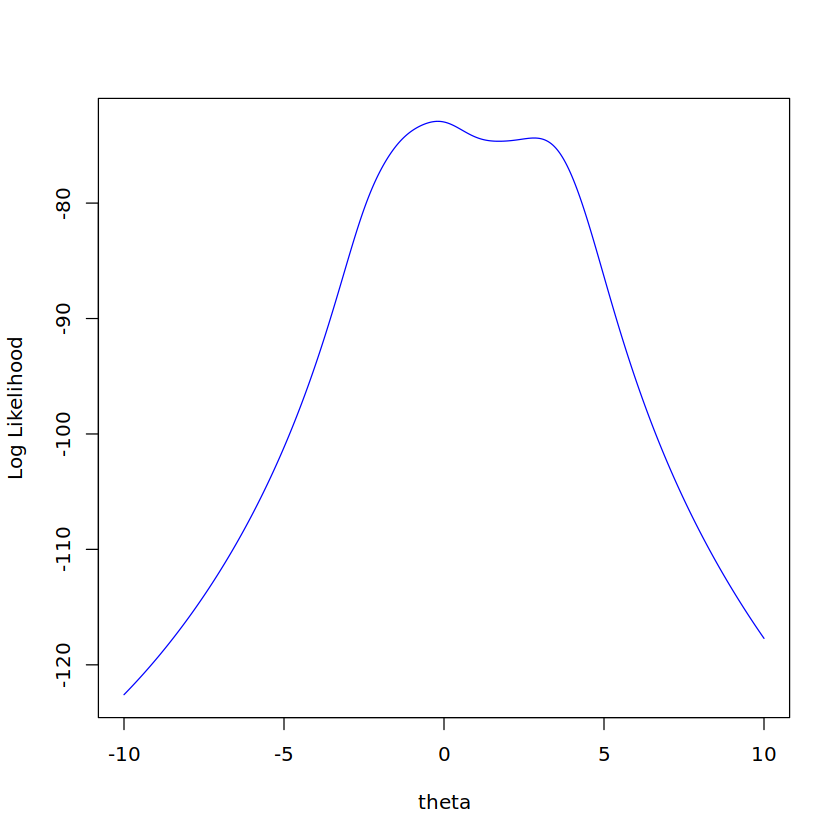

In [5]:
theta_seq <- seq(-10, 10, by = 0.05)

plot(
    theta_seq,
    loglikelihood_f(x, theta_seq),
    type = "l",
    col = "blue",
    xlab = 'theta',
    ylab = 'Log Likelihood'
)

In [6]:
diff <- function(x, theta, scale = 1, step=0.0001) {
    f1 = loglikelihood_f(x, theta + step, scale)
    f2 = loglikelihood_f(x, theta, scale)

    return((f1 - f2)/step)
}

In [7]:
first_derivative <- function(x, theta) {
    total <- 0.
    for (x_i in x) {
        total <- total + (x_i - theta) / (1 + (x_i - theta)^2)
    }
    
    2*total
}

In [8]:
second_derivative <- function(x, theta) {
    total <- 0.
    for (x_i in x) {
        num_val <- (x_i - theta)^2 - 1
        de_val <- (1 + (x_i - theta)^2)^2
        total <- total + num_val / de_val
    }

    2*total
}

In [9]:
plot_optimal_point <- function(optimal_point, plot_name) {
    plot(
        theta_seq,
        loglikelihood_f(x, theta_seq),
        type = "l",
        col = "blue",
        xlab = 'theta',
        ylab = 'Log Likelihood'
    )
    abline(v=optimal_point, col="red")
    title(main=paste(strwrap(plot_name, width=60), collapse="\n"))
}

### Newton-Raphson method

**Updating equation in Newton-Raphson method:**
$\theta^{t + 1}$ $=$ $\theta^{t}$ - $\frac{f^{'}(x)}{f^{''}(x)}$

In [10]:
newton_updating <- function(x, theta, epsilon=1e-6) {
    new_theta <- theta - first_derivative(x, theta) / (second_derivative(x, theta) + epsilon)

    new_theta
}

In [11]:
newton_optimizer <- function(x, max_iter, threshold, theta) {
    for (i in 1:max_iter) {
        iter <- i
        old_theta <- theta
        theta <- newton_updating(x, old_theta)
        
        if (abs(theta - old_theta) <= threshold) {
            return(list(iters=iter, theta=theta))
        }
    }

    return(list(iters=iter, theta=theta))
}

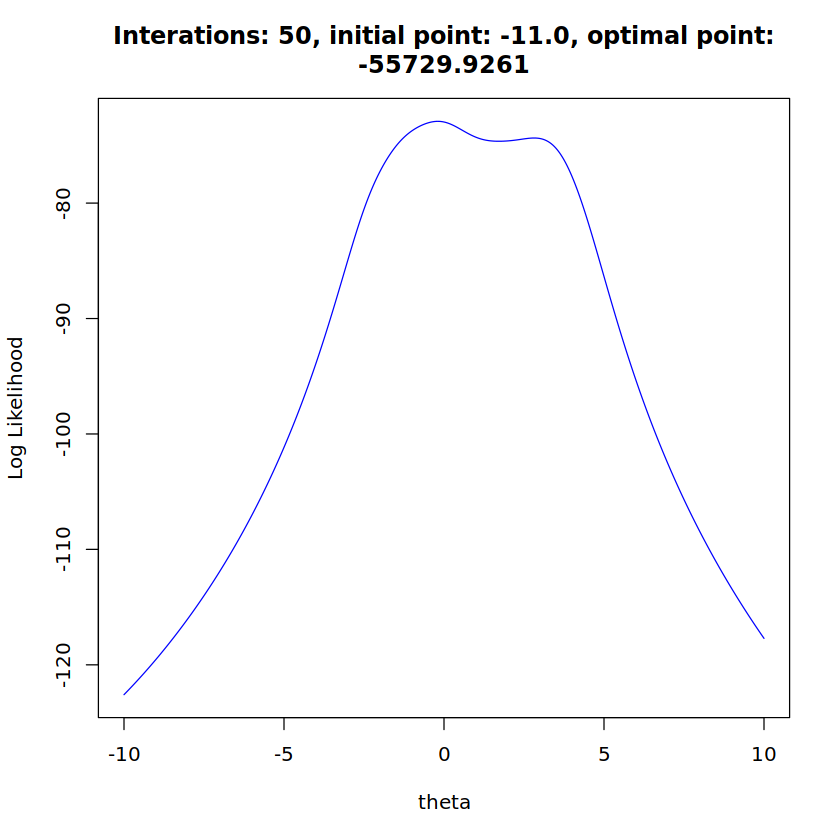

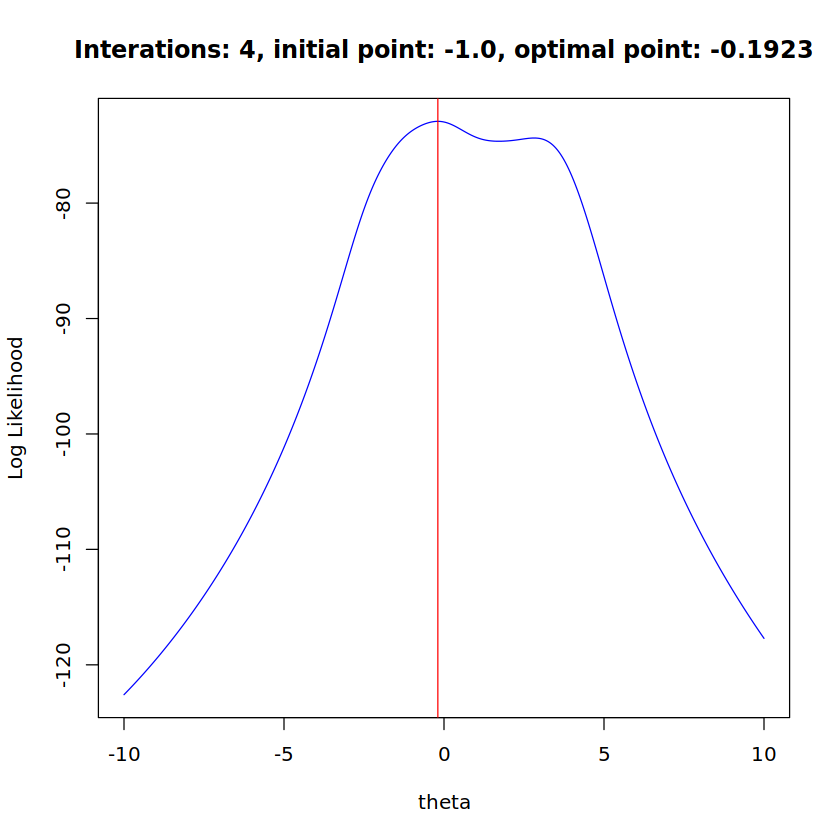

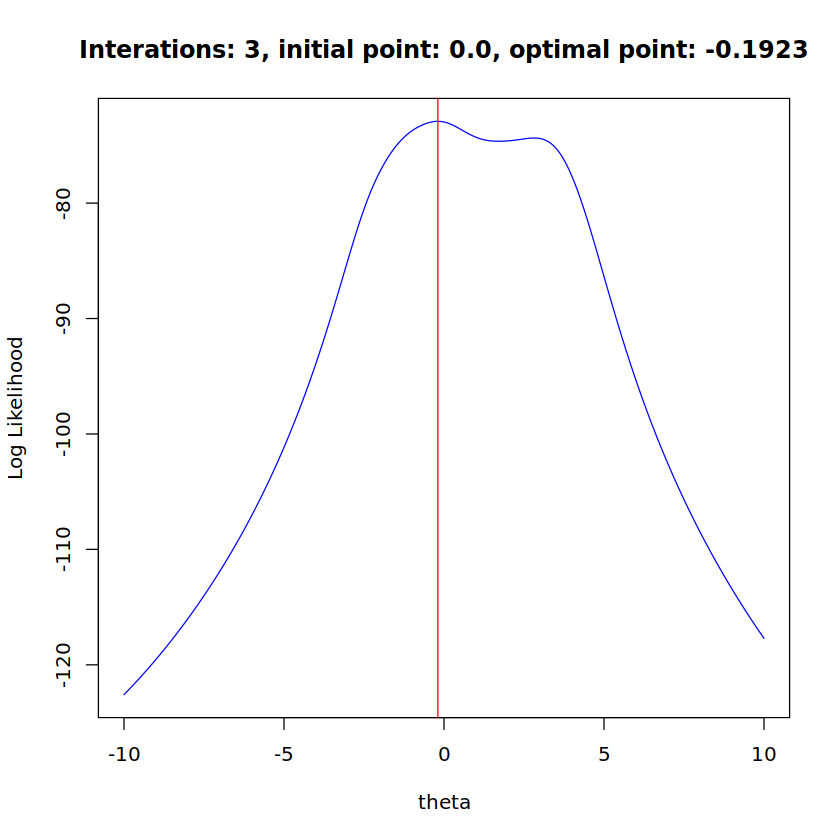

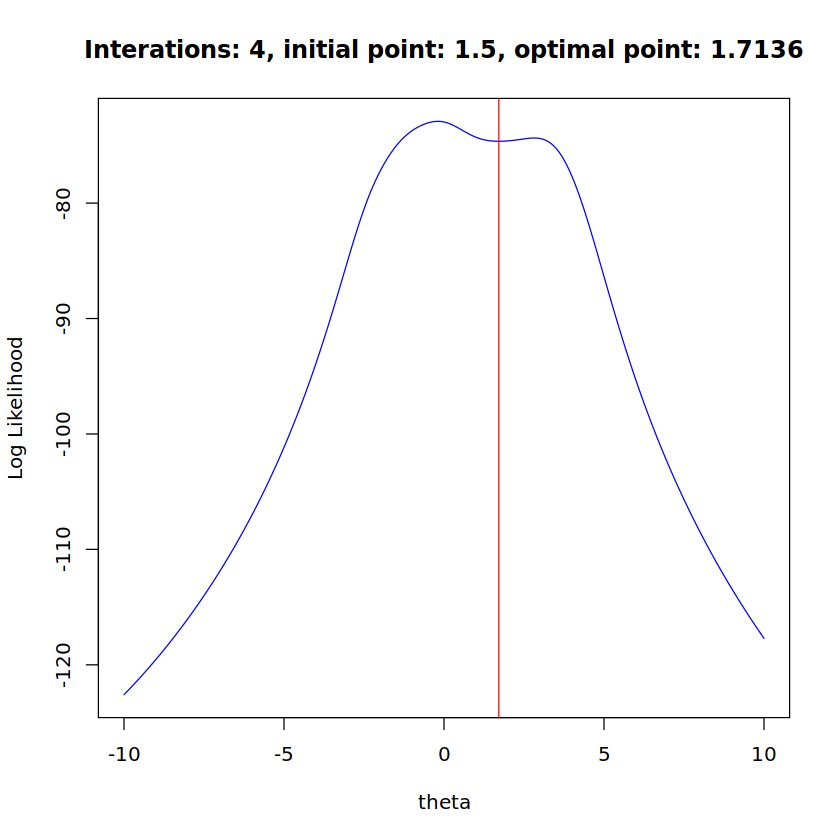

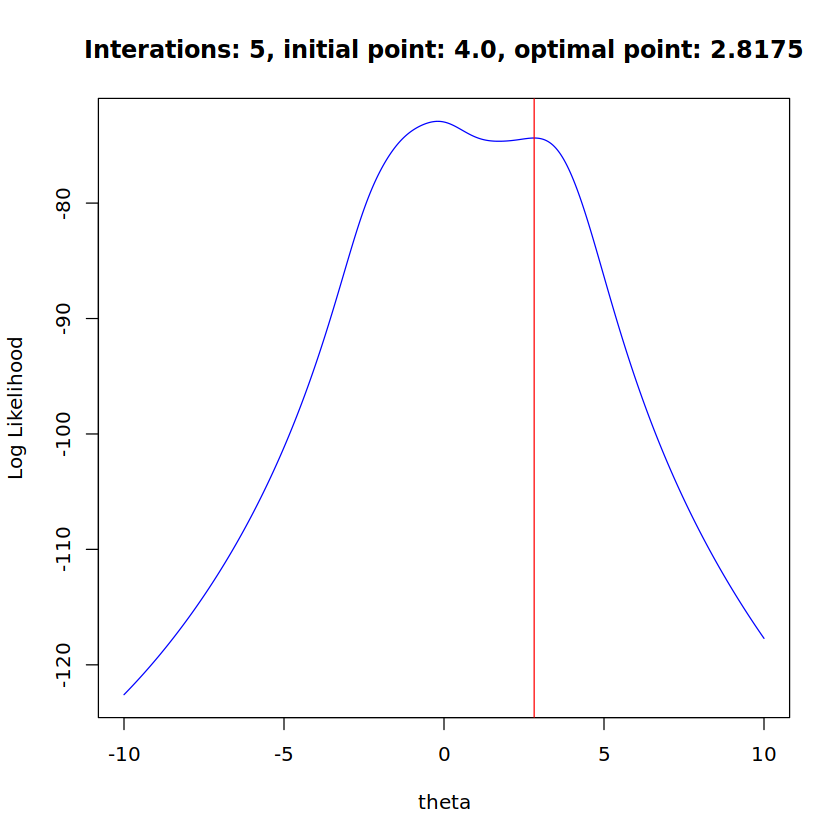

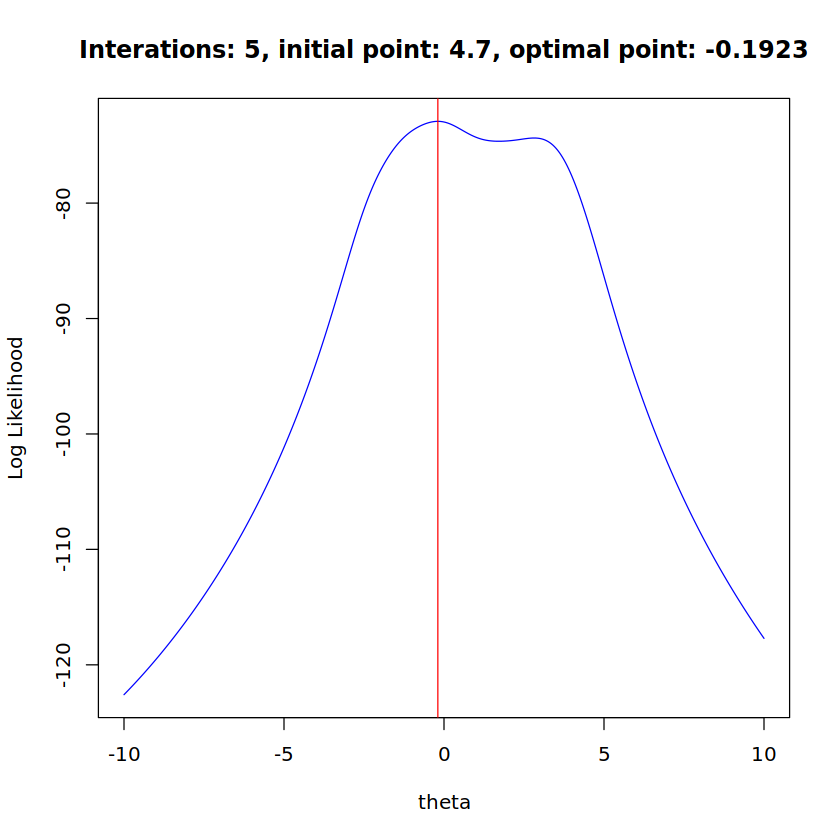

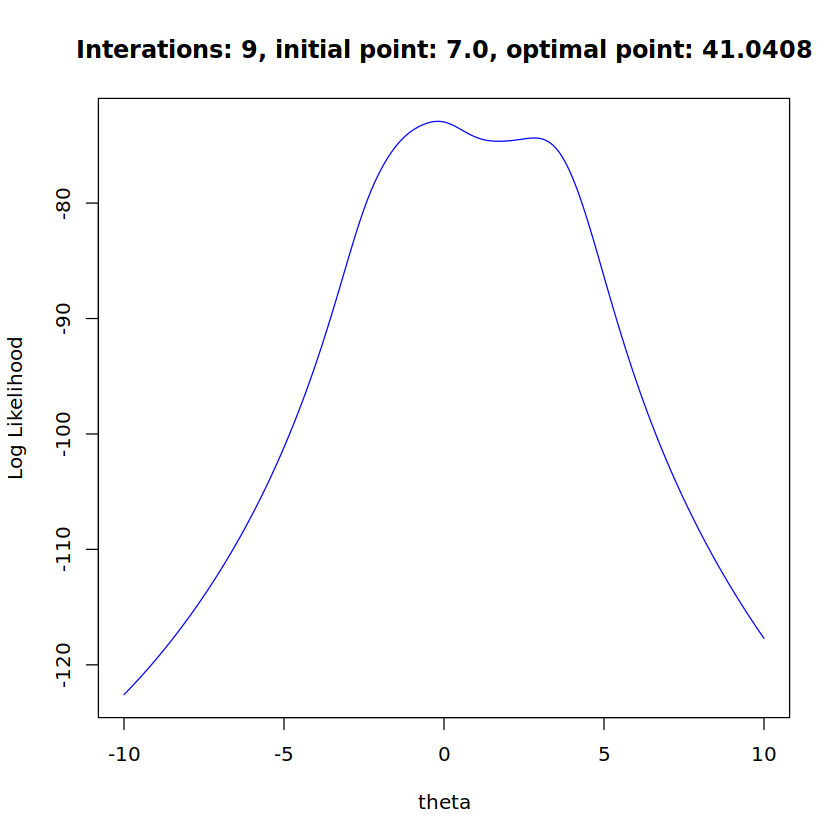

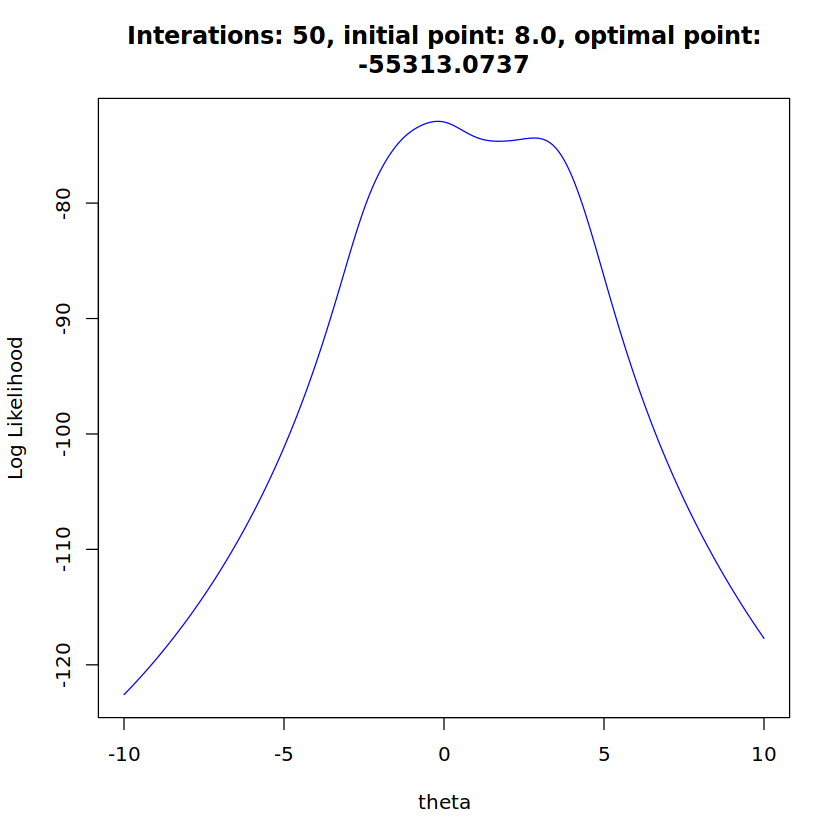

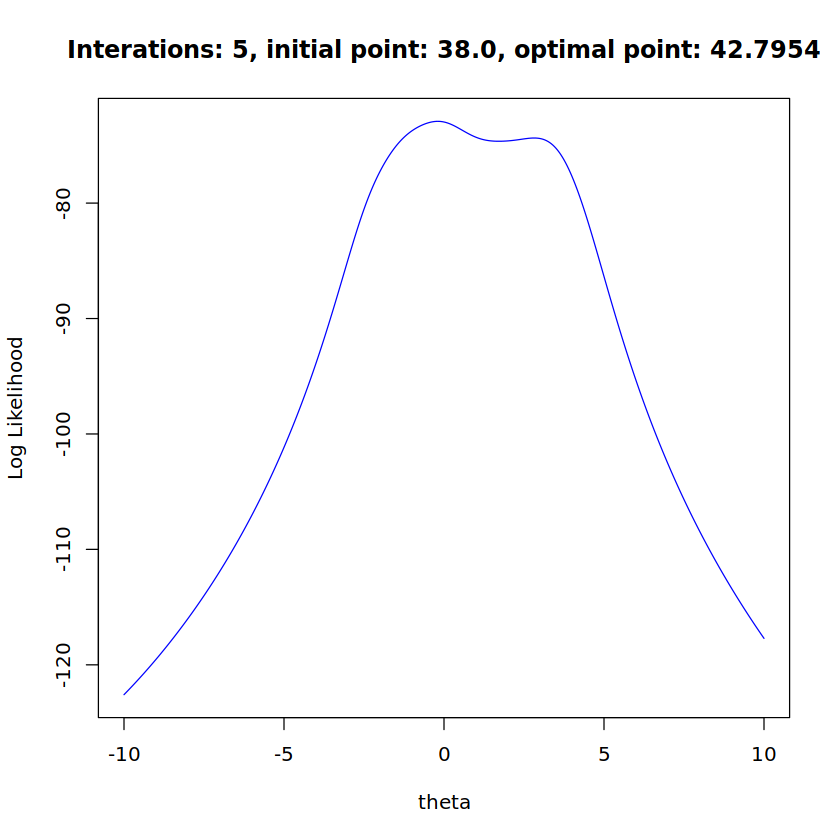

In [12]:
max_iter <- 50
threshold <- 1e-5
starting_points <- c(-11, -1, 0, 1.5, 4, 4.7, 7, 8, 38.)

for (init_theta in starting_points) {
    result <- newton_optimizer(x, max_iter, threshold, init_theta)
    plot_name <- sprintf("Interations: %d, initial point: %.1f, optimal point: %.4f",
                         result$iters, init_theta, result$theta)
    plot_optimal_point(result$theta, plot_name)
}

Initialize starting point using mean of the data

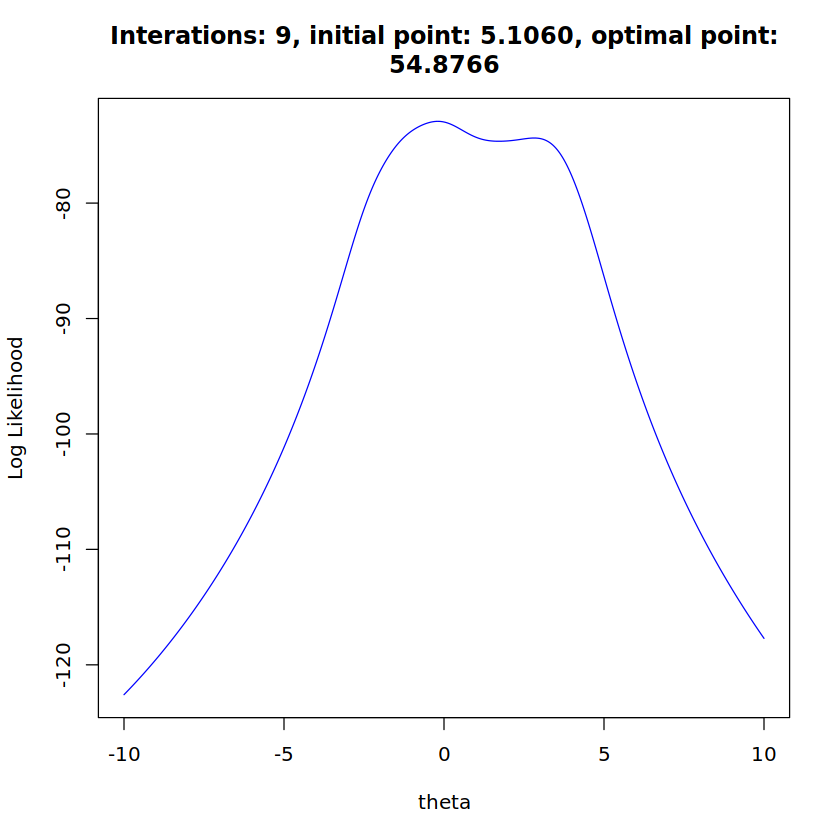

In [13]:
max_iter <- 50
threshold <- 1e-5

init_theta <- sum(x) / length(x)
theta <- init_theta
for (i in 1:max_iter) {
    old_theta <- theta
    theta <- newton_updating(x, old_theta)
    iter <- i
    
    if (abs(theta - old_theta) <= threshold) {
        break
    }
}
plot_name <- sprintf("Interations: %d, initial point: %.4f, optimal point: %.4f", iter, init_theta, theta)
plot_optimal_point(theta, plot_name)

### Bisection method

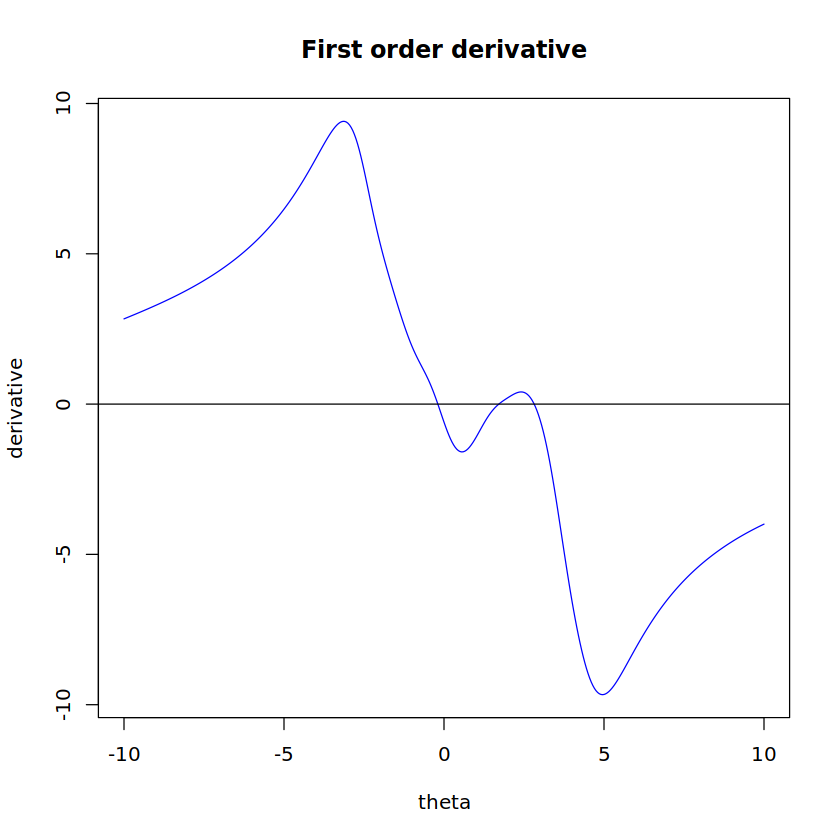

In [14]:
plot(
    theta_seq,
    first_derivative(x, theta_seq),
    type = "l",
    main = "First order derivative",
    col = "blue",
    xlab = "theta",
    ylab = "derivative"
)
abline(h=0, col="black")

In [15]:
bisection_optimizer <- function(x, max_iter, threshold, l_theta, r_theta) {
    theta <- Inf
    for (i in 1:max_iter) {
        iter <- i
        old_theta = theta
        
        theta <- (l_theta + r_theta) / 2
        if (first_derivative(x, l_theta) * first_derivative(x, theta) >= 0) {
            l_theta = theta
        } else {
            r_theta = theta
        }
        
        if (abs(theta - old_theta) <= threshold) {
            return(list(iters=iter, theta=theta))
        }
    }

    return(list(iters=iter, theta=theta))
}

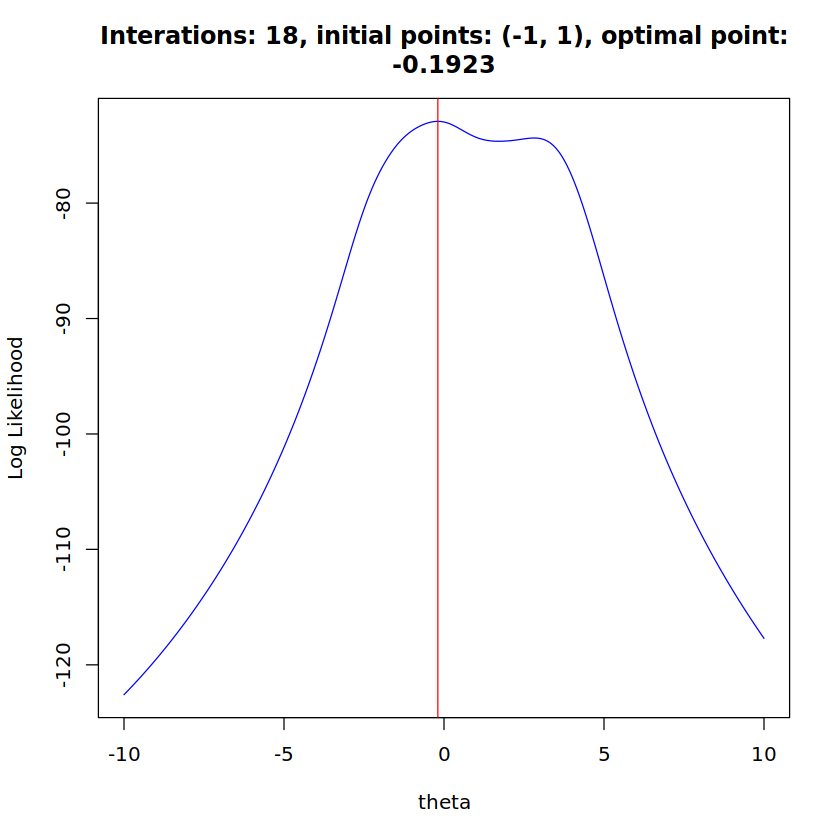

In [16]:
max_iter <- 50
threshold <- 1e-5
l_theta <- -1
r_theta <- 1

result <- bisection_optimizer(x, max_iter, threshold, l_theta, r_theta)
plot_name <- sprintf("Interations: %d, initial points: (%.0f, %.0f), optimal point: %.4f",
                     result$iters, l_theta, r_theta, result$theta)
plot_optimal_point(result$theta, plot_name)

Bisection method drop into local optimal with intitial points: $(1., 3.)$

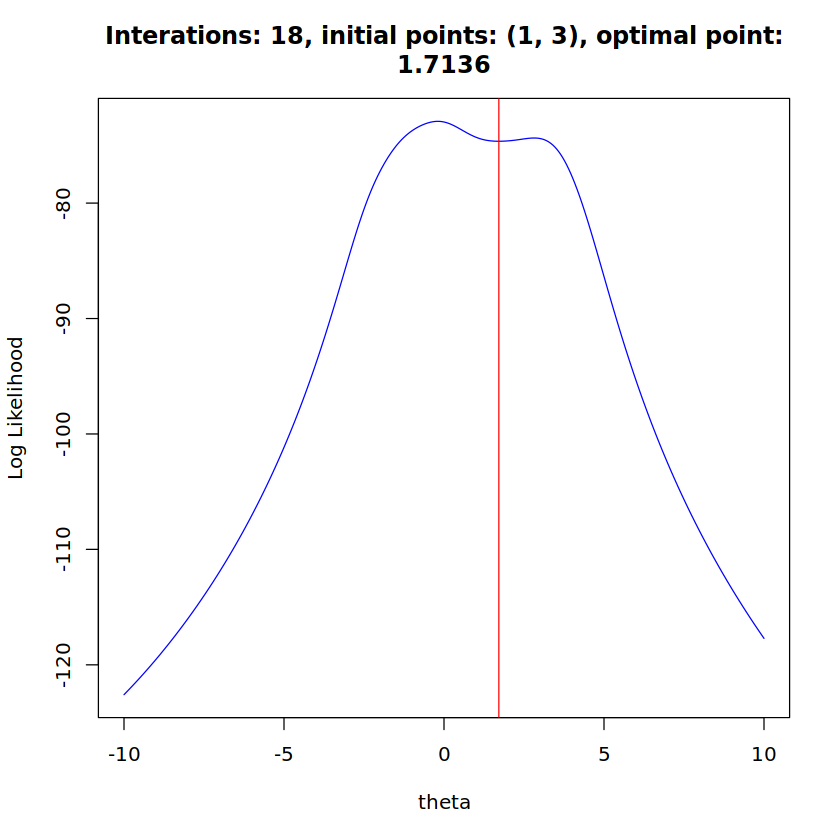

In [17]:
max_iter <- 50
threshold <- 1e-5
l_theta <- 1.
r_theta <- 3.

result <- bisection_optimizer(x, max_iter, threshold, l_theta, r_theta)
plot_name <- sprintf("Interations: %d, initial points: (%.0f, %.0f), optimal point: %.4f",
                     result$iters, l_theta, r_theta, result$theta)
plot_optimal_point(result$theta, plot_name)

### Fixed-point iteration method

**Updating equation:** $\theta^{t+1} = \theta^{t} + \alpha f^{'}(x^{t})$

In [18]:
fixedpoint_optimizer <- function(x, max_iter, threshold, scaling_factor, init_theta){
    theta <- init_theta
    for (i in 1:max_iter) {
        iter <- i
        old_theta = theta
        
        theta <- theta + scaling_factor * first_derivative(x, theta)
        
        if (abs(theta - old_theta) <= threshold) {
            return(list(iters=iter, theta=theta)) 
        }
    }
    
    return(list(iters=iter, theta=theta))
}

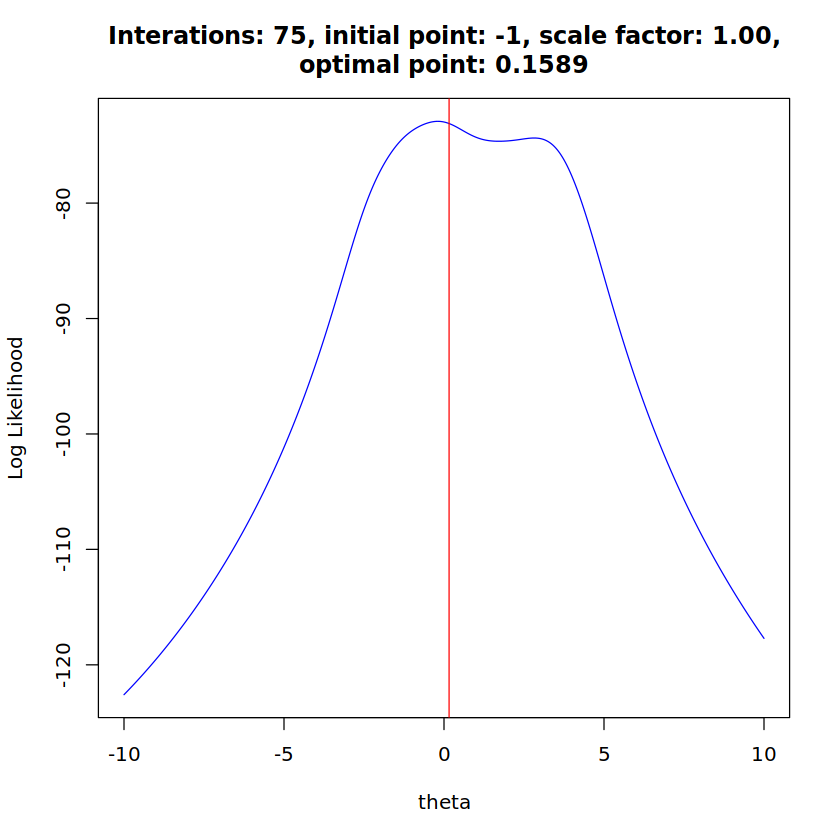

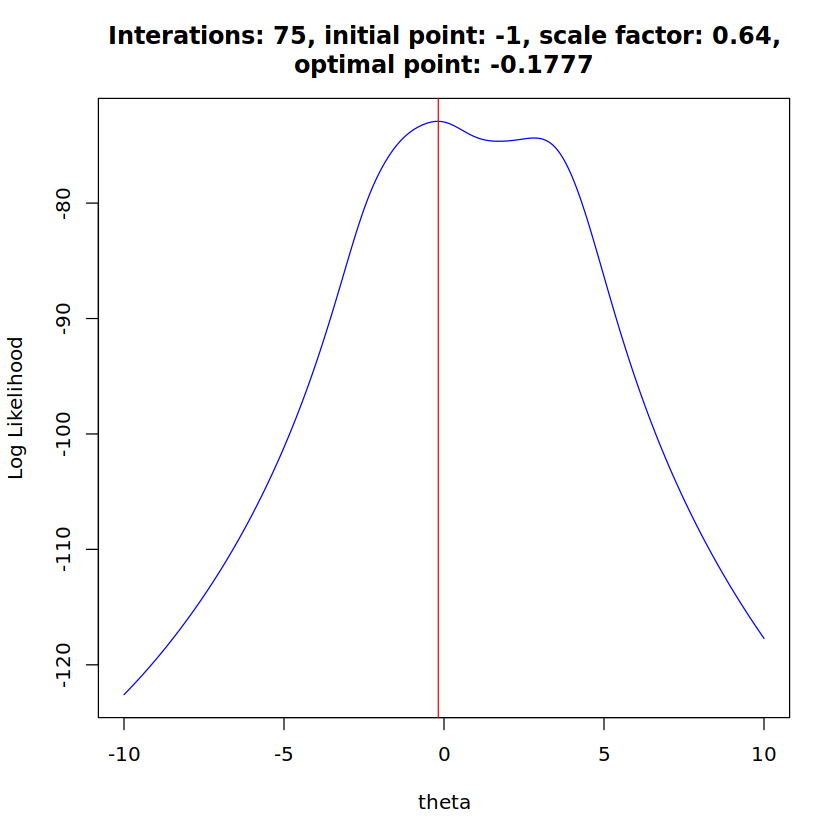

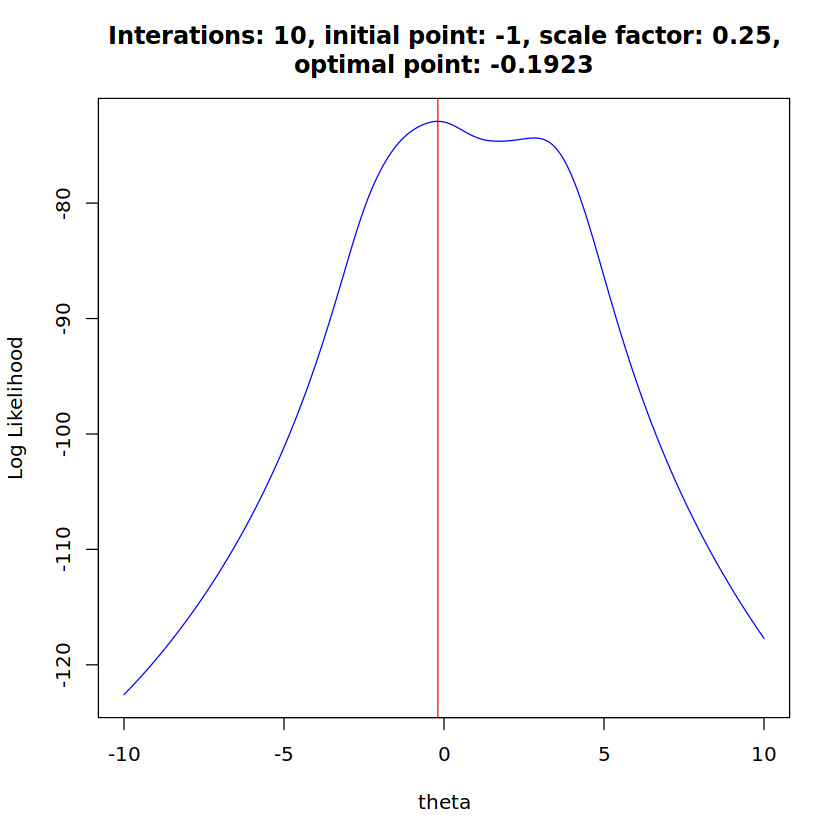

In [19]:
max_iter <- 75
threshold <- 1e-5

scaling_factors <- c(1, 0.64, 0.25)
theta <- -1

for (factor in scaling_factors) {
    result <- fixedpoint_optimizer(x, max_iter, threshold, factor, theta)
    plot_name <- sprintf("Interations: %d, initial point: %.0f, scale factor: %.2f, optimal point: %.4f",
                         result$iters, -1, factor, result$theta)
    plot_optimal_point(result$theta, plot_name)
}

### Secant method

**Updating equation:** $\theta^{t + 1}$ $=$ $\theta^{t}$ $-$ $f^{'}(\theta^{t})$$\frac{\theta^{t} - \theta^{t - 1}}{f^{'}(\theta^{t}) - f^{'}(\theta^{t - 1})}$

This method is similar to Newton-Raphson method except for: $f^{''}(\theta)$ $\approx$ $\frac{f^{'}(\theta^{t}) - f^{'}(\theta^{t - 1})}{\theta^{t} - \theta^{t - 1}}$

In [20]:
secant_updating <- function(x, theta, prev_theta) {
    inv_second_diff = (theta - prev_theta) / (first_derivative(x, theta) - first_derivative(x, prev_theta))
    new_theta = theta - first_derivative(x, theta) * inv_second_diff

    new_theta
}

In [21]:
secant_optimizer <- function(x, max_iter, threshold, init_prev_theta, init_theta) {
    for (i in 1:max_iter) {
        iter <- i
        old_theta <- theta
        theta <- secant_updating(x, theta, prev_theta)
        prev_theta <- old_theta
        
        if (abs(theta - old_theta) <= threshold) {
            return(list(iters=iter, theta=theta))
        }
    }
    return(list(iters=iter, theta=theta))
}

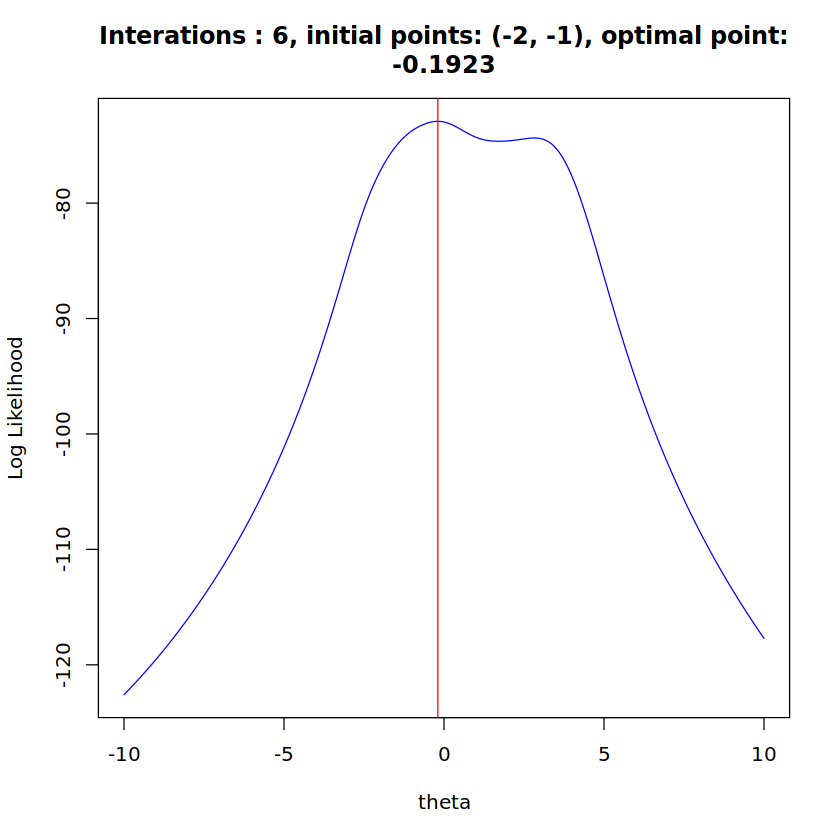

In [22]:
max_iter <- 50
threshold <- 1e-5
prev_theta <- -2
theta <- -1

result <- secant_optimizer(x, max_iter, threshold, prev_theta, theta)

plot_name <- sprintf("Interations : %d, initial points: (%.0f, %.0f), optimal point: %.4f",
                    result$iters, prev_theta, theta, result$theta)
plot_optimal_point(result$theta, plot_name)

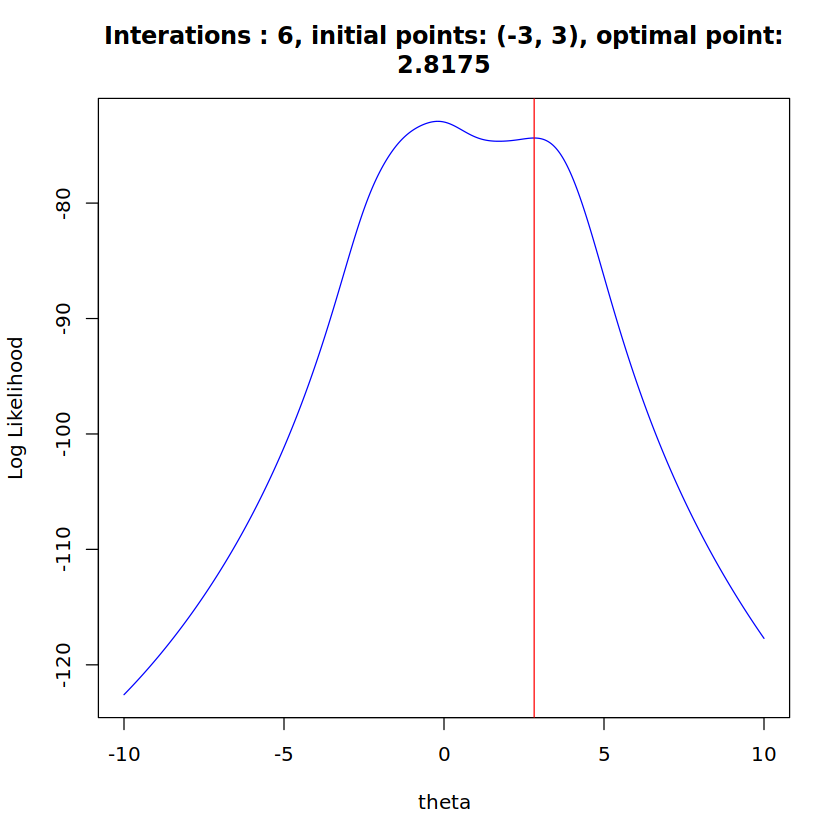

In [23]:
max_iter <- 50
threshold <- 1e-5
prev_theta <- -3
theta <- 3

result <- secant_optimizer(x, max_iter, threshold, prev_theta, theta)

plot_name <- sprintf("Interations : %d, initial points: (%.0f, %.0f), optimal point: %.4f",
                    result$iters, prev_theta, theta, result$theta)
plot_optimal_point(result$theta, plot_name)

In [24]:
## Gradient check
# x <- c(
#     1.77, -0.23, 2.76, 3.80, 3.47,
#     56.75, -1.34, 4.24, -2.44, 3.29,
#     3.71, -2.40, 4.53, -0.07, -1.05,
#     -13.87, -2.53, -1.75, 0.27, 43.21
# )
# theta <- 0.

# val1 <- diff(x, theta, step=1e-6)
# val2 <- first_derivative(x, theta)

# (val1 - val2) / val1